In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sb
import time
#from ipywidgets import interact, fixed
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from libs import build_params
from libs.datasets import JHUDataset
from libs.datasets import FIPSPopulation
from libs.datasets import DHBeds
from libs.datasets.dataset_utils import AggregationLevel

from libs.ModelRun import ModelRun, prep_plot, report_months, plot_actuals

ModuleNotFoundError: No module named 'libs'

In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
%matplotlib inline

import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [49]:
min_date = pd.to_datetime(datetime.datetime(2020, 1, 1))
epi_model = 'asymp'

beds_data = DHBeds.local().beds()
population_data = FIPSPopulation.local().population()

Could not match ('MP', 'Saipan')
Could not match ('PR', 'Mayaguez')
Could not match ('AS', 'American Samoa')
Could not match ('GU', 'Guam')


In [50]:
timeseries = JHUDataset.local().timeseries()

Did not match 58 codes to county data.
['00066', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80015', '80040', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90023', '90024', '90025', '90026', '90027', '90028', '90029', '90030', '90031', '90032', '90033', '90034', '90035', '90036', '90037', '90038', '90039', '90040', '90041', '90042', '90044', '90046', '90047', '90049', '90050', '90051', '90053', '90054', '90055', '99999']


In [51]:
#tmp = timeseries.get_data(state='NY')

#tmp.loc[(tmp['generated'] == True), ['date', 'cases', 'deaths', 'recovered']].groupby('date').sum()

#tmp.loc[(tmp['date'] == datetime.datetime(2020, 4, 6)), :]

In [52]:
test = ModelRun('NY')
test.get_data_subset(beds_data, population_data, timeseries, min_date)
test.set_epi_model('asymp')

In [53]:
test.epi_run.EpiParameters.generate_r0()

3.073999999999998

In [54]:
test.run()

[404447.5, 404447.5, 40444.75, 10111.1875, 0.0, 7067.0, 121334.25]


/Users/trae/.virtualenvs/covid-data-model/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/trae/.virtualenvs/covid-data-model/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [55]:
actuals_date = test.epi_run.display_df.loc[(test.epi_run.display_df['source'] == 'actuals'), 'date'].max()

first case
2020-03-02 00:00:00
peak in hospitalizations
2020-05-05T00:00:00.000000000
254,787.37667479977
peak in icu
2020-05-12T00:00:00.000000000
51,147.35581322534
deaths
104,706.02328604252


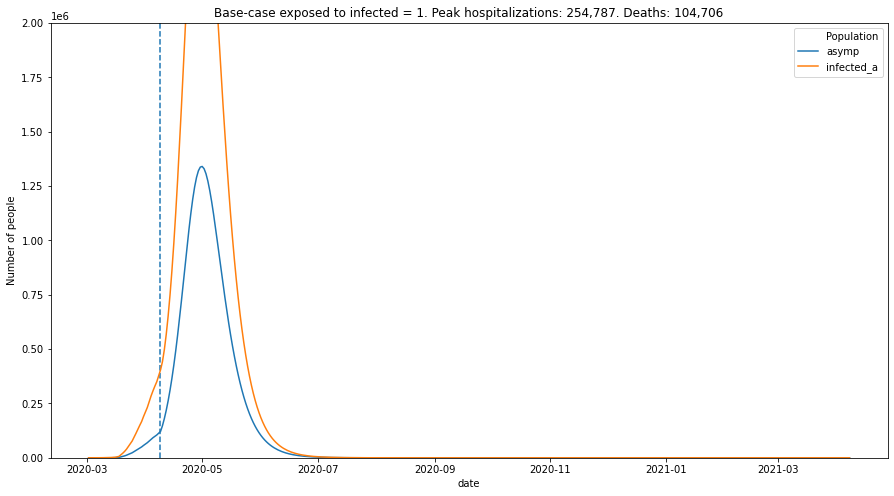

In [56]:
#cols = ["infected_b", "infected_c", "dead"]

cols = ["asymp", "infected_a"]

prep_plot(test.epi_run.display_df, cols, f'Base-case exposed to infected = {str(test.exposed_infected_ratio)}', 2000000)

In [57]:
test.percent_asymp

0.3

In [58]:
print(test.epi_run.InitConditions.mild)
print(test.epi_run.InitConditions.hospitalized)
print(test.epi_run.InitConditions.icu)
print(test.epi_run.InitConditions.asymp)

404447.5
40444.75
10111.1875
121334.25


In [59]:
print(test.epi_run.model_run.hospitalization_rate)
print(test.epi_run.model_run.hospitalized_cases_requiring_icu_care)

0.1
0.25


In [60]:
test.epi_run.InitConditions.mild = test.epi_run.InitConditions.mild * 3

In [61]:
print(test.epi_run.InitConditions.mild)

1213342.5


In [62]:
test.run()

[404447.5, 1213342.5, 40444.75, 10111.1875, 0.0, 7067.0, 121334.25]


/Users/trae/.virtualenvs/covid-data-model/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [1]:
sb.palplt(sb.xkcd_palette(range(0, 10)))

NameError: name 'sb' is not defined

first case
2020-03-02 00:00:00
peak in hospitalizations
2020-05-01T00:00:00.000000000
266,899.6915134929
peak in icu
2020-05-07T00:00:00.000000000
53,592.73089677244
deaths
106,620.00118941395


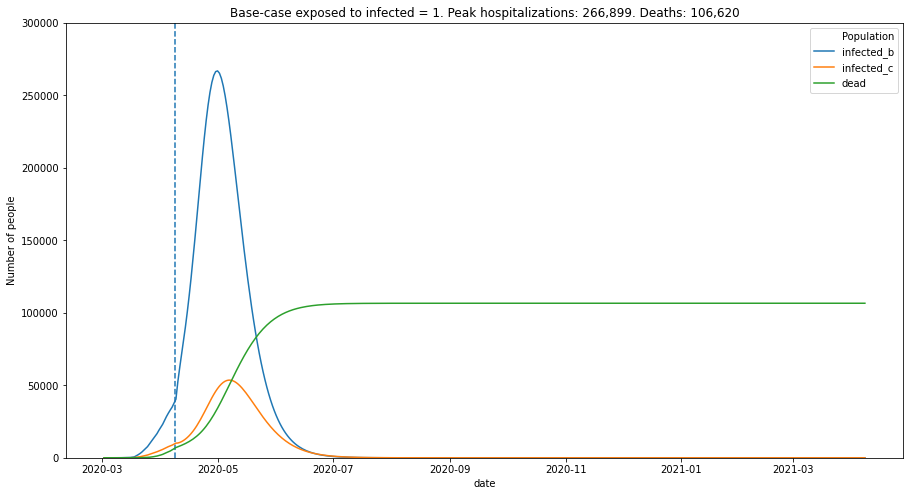

In [63]:
cols = ["infected_b", "infected_c", "dead"]

prep_plot(test.epi_run.display_df, cols, f'Base-case exposed to infected = {str(test.exposed_infected_ratio)}', 300000)

first case
2020-03-02 00:00:00
peak in hospitalizations
2020-04-30T00:00:00.000000000
266,423.0340457682
peak in icu
2020-04-30T00:00:00.000000000
45,850.08404624099
deaths
31,883.30658948489


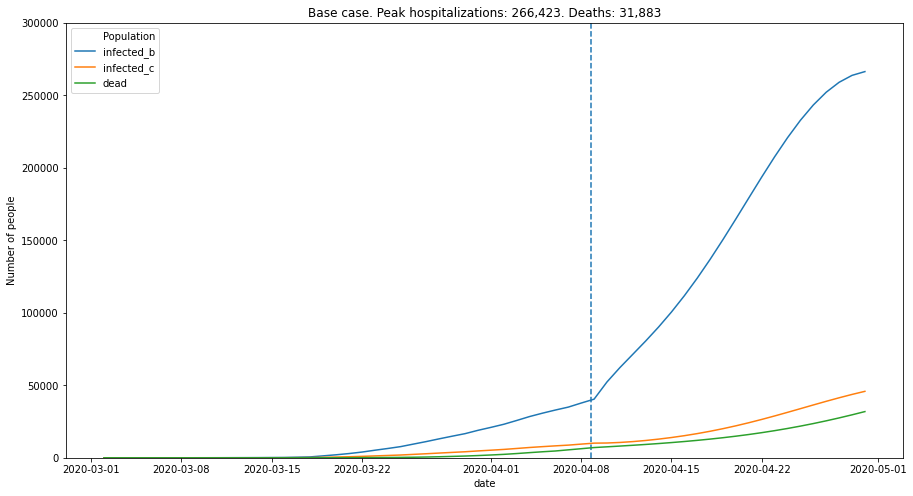

In [64]:
#cols = ["symptomatic_infected", "infected_a", "infected_b", "infected_c", "dead"]
cols = ["infected_b", "infected_c", "dead"]

test_df = test.epi_run.display_df.copy()

end_date = datetime.datetime(2020, 5, 1)

test_df['symptomatic_infected'] = test_df.infected_a + test_df.infected_b + test_df.infected_c

test_df = test_df.loc[(test_df['date'] < end_date), :]

prep_plot(test_df, cols, 'Base case', 300000)

In [65]:
# change inital condition params
test.exposed_infected_ratio = 3
test.model_cases = "divided_into_infected"

# reload
test.reload_params()

print(test.epi_run.EpiParameters.generate_r0())

3.073999999999998


In [66]:
#test.epi_run.InitConditions.mild = test.epi_run.InitConditions.mild / 3

In [67]:
test.run()

[424669.875, 141556.625, 16177.900000000001, 4044.4750000000004, 0.0, 7067.0, 42466.987499999996]


first case
2020-03-02 00:00:00
peak in hospitalizations
2020-05-09T00:00:00.000000000
251,193.95689749497
peak in icu
2020-05-15T00:00:00.000000000
50,190.20720240396
deaths
100,483.87020406227


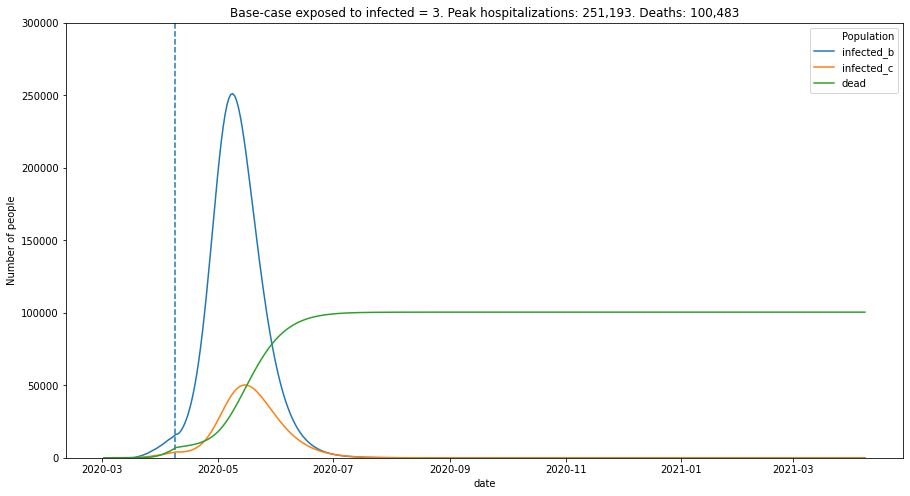

In [68]:
cols = ["infected_b", "infected_c", "dead"]

prep_plot(test.epi_run.display_df, cols, f'Base-case exposed to infected = {str(test.exposed_infected_ratio)}', 300000)

In [69]:
test.epi_run.display_df.iloc[30:].head()

,date,exposed,infected_a,infected_b,infected_c,recovered,dead,asymp,source,infected
65929,2020-04-01,220363.50,73454.50,8394.80,2098.70,0.00,1941.00,22036.35,actuals,105984.35
65984,2020-04-02,242828.25,80942.75,9250.60,2312.65,0.00,2373.00,24282.83,actuals,116788.82
66041,2020-04-03,270340.88,90113.62,10298.70,2574.68,0.00,2935.00,27034.09,actuals,130021.09
66098,2020-04-04,298811.62,99603.88,11383.30,2845.83,0.00,3565.00,29881.16,actuals,143714.16
66155,2020-04-05,323295.00,107765.00,12316.00,3079.00,0.00,4159.00,32329.50,actuals,155489.50


In [70]:
school = {
    'name': 'school',
    'start_date': pd.to_datetime(datetime.datetime(2020, 4, 5)),
    'intervention_start_date': pd.to_datetime(datetime.datetime(2020, 3, 18)),
    'new_parameters': {
        'beta': 0.3,
        'beta_asymp': 0.3,
    },
    'type': 'past-actual',
}

test.add_intervention(school)

stay_at_home = {
    'name': 'stay_at_home',
    'start_date': pd.to_datetime(datetime.datetime(2020, 4, 5)),
    'intervention_start_date': pd.to_datetime(datetime.datetime(2020, 3, 22)),
    'new_parameters': {
        'beta': 0.25,
        'beta_asymp': 0.2,
    },
    'type': 'past-actual',
}

test.add_intervention(stay_at_home)

323295.0
323295.0


In [71]:
test.add_intervention(stay_at_home)

323295.0


In [72]:
test.interventions

{'intervention_NY_school': <libs.epi_models.TalusSEIRClass.Intervention at 0x1278a0310>,
 'intervention_NY_stay_at_home': <libs.epi_models.TalusSEIRClass.Intervention at 0x127870d90>}

In [73]:
print(test.interventions['intervention_NY_school'].EpiParameters.generate_r0())
print(test.interventions['intervention_NY_stay_at_home'].EpiParameters.generate_r0())

1.8739999999999999
1.574


In [90]:
#test.run_intervention('intervention_NY_school')
test.run_intervention('intervention_NY_stay_at_home')

running intervetion intervention_NY_stay_at_home
(0, 1.2851117592300967e-08, 5.140447036920387e-09, 5.140447036920387e-09, 1.2851117592300967e-08)
0.24999999999999997
[323295.0, 107765.0, 12316.0, 3079.0, 0.0, 4159.0, 32329.5]


first case
2020-03-02 00:00:00
peak in hospitalizations
2020-05-09T00:00:00.000000000
251,193.95689749497
peak in icu
2020-05-15T00:00:00.000000000
50,190.20720240396
deaths
100,483.86852006761


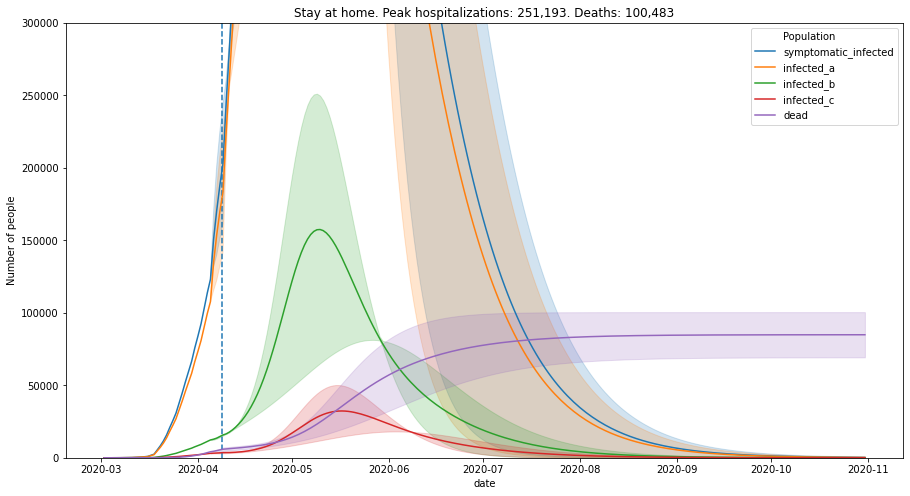

In [75]:
cols = ["symptomatic_infected", "infected_a", "infected_b", "infected_c", "dead"]

test_df = test.interventions['intervention_NY_stay_at_home'].display_df.copy()

end_date = datetime.datetime(2020, 11, 1)

test_df['symptomatic_infected'] = test_df.infected_a + test_df.infected_b + test_df.infected_c

test_df = test_df.loc[(test_df['date'] < end_date), :]

prep_plot(test_df, cols, 'Stay at home', 300000)

first case
2020-03-02 00:00:00
peak in hospitalizations
2020-05-09T00:00:00.000000000
251,193.95689749497
peak in icu
2020-05-15T00:00:00.000000000
50,190.20720240396
deaths
99,130.00454668468


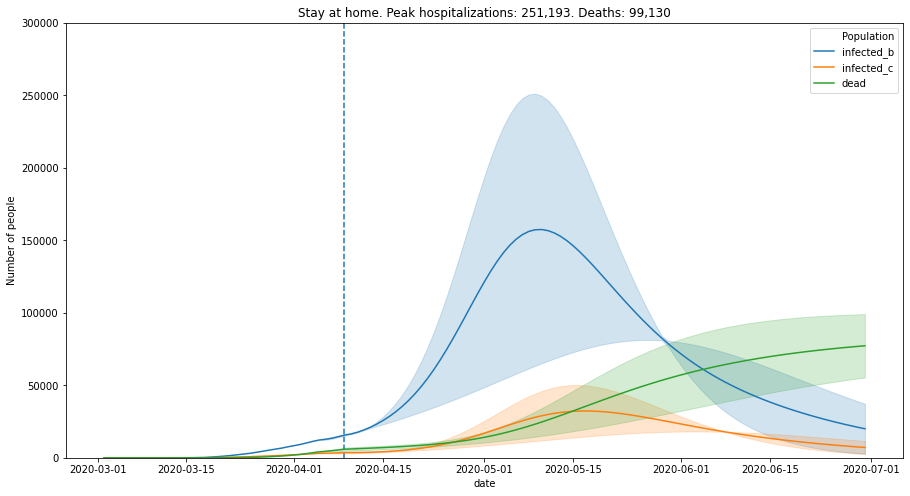

In [76]:
#cols = ["symptomatic_infected", "infected_a", "infected_b", "infected_c", "dead"]

cols = ["infected_b", "infected_c", "dead"]

test_df = test.interventions['intervention_NY_stay_at_home'].display_df.copy()

end_date = datetime.datetime(2020, 7, 1)

test_df['symptomatic_infected'] = test_df.infected_a + test_df.infected_b + test_df.infected_c

test_df = test_df.loc[(test_df['date'] < end_date), :]

prep_plot(test_df, cols, 'Stay at home', 300000)

first case
2020-03-02 00:00:00
peak in hospitalizations
2020-04-30T00:00:00.000000000
180,704.47847453115
peak in icu
2020-04-30T00:00:00.000000000
23,104.487127261462
deaths
16,542.250694479164


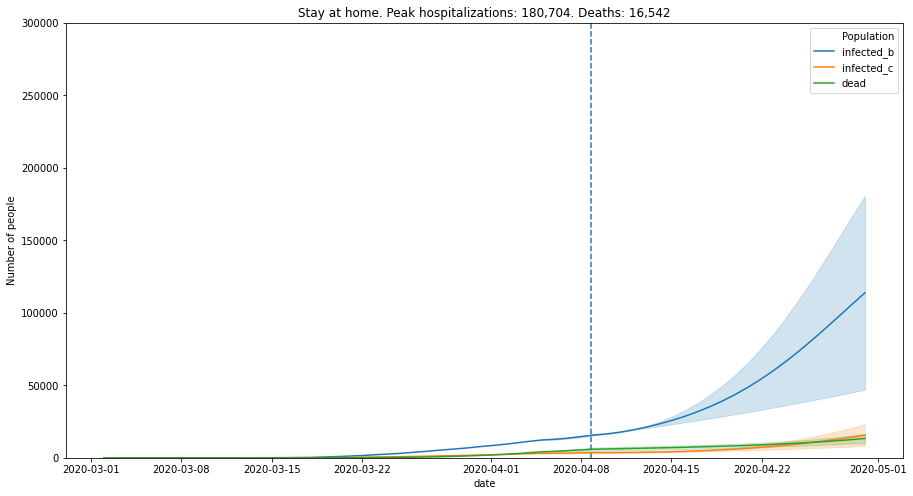

In [77]:
#cols = ["symptomatic_infected", "infected_a", "infected_b", "infected_c", "dead"]
cols = ["infected_b", "infected_c", "dead"]

test_df = test.interventions['intervention_NY_stay_at_home'].display_df.copy()

end_date = datetime.datetime(2020, 5, 1)

test_df['symptomatic_infected'] = test_df.infected_a + test_df.infected_b + test_df.infected_c

test_df = test_df.loc[(test_df['date'] < end_date), :]

prep_plot(test_df, cols, 'Stay at home', 300000)

first case
2020-03-02 00:00:00
peak in hospitalizations
2020-05-09T00:00:00.000000000
251,193.95689749497
peak in icu
2020-05-15T00:00:00.000000000
50,190.20720240396
deaths
100,483.87020406227


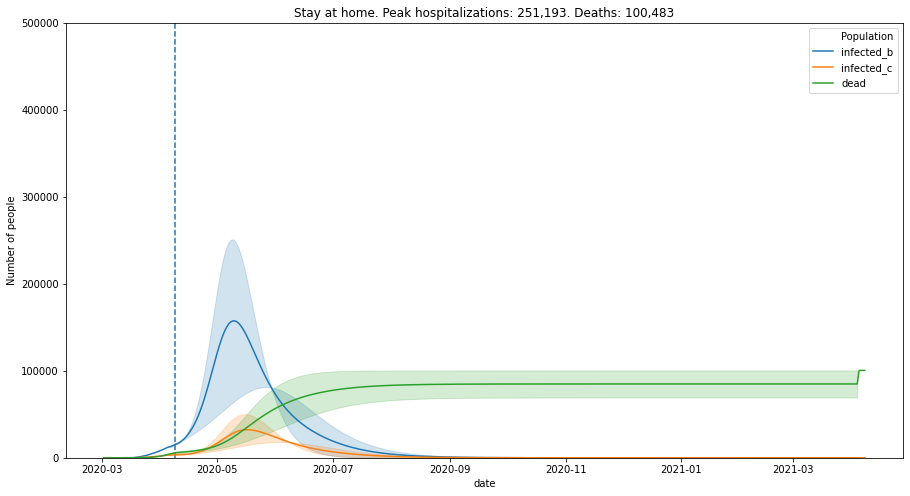

In [78]:
cols = ["infected_b", "infected_c", "dead"]

prep_plot(test.interventions['intervention_NY_stay_at_home'].display_df, cols, 'Stay at home', 500000)

In [79]:
lift_early = {
    'name': 'lift_early',
    'start_date': pd.to_datetime(datetime.datetime(2020, 4, 12)),
    'intervention_start_date': pd.to_datetime(datetime.datetime(2020, 4, 12)),
    'new_parameters': {
        'beta': 0.25,
        'beta_asymp': 0.25,
    },
    'type': 'intervention',
}

test.add_intervention(lift_early)

test.run_intervention('intervention_NY_lift_early')

958968.7775093737
[958968.7775093737, 319656.25916979124, 19332.9749227531, 4039.69255626819, 153169.6740583388, 7669.693880680256, 129553.58821192123]


In [80]:
test.interventions['intervention_NY_lift_early'].EpiParameters.generate_r0()

1.574

first case
2020-03-02 00:00:00
peak in hospitalizations
2020-05-09T00:00:00.000000000
251,193.95689749497
peak in icu
2020-05-15T00:00:00.000000000
50,190.20720240396
deaths
100,483.86852006761


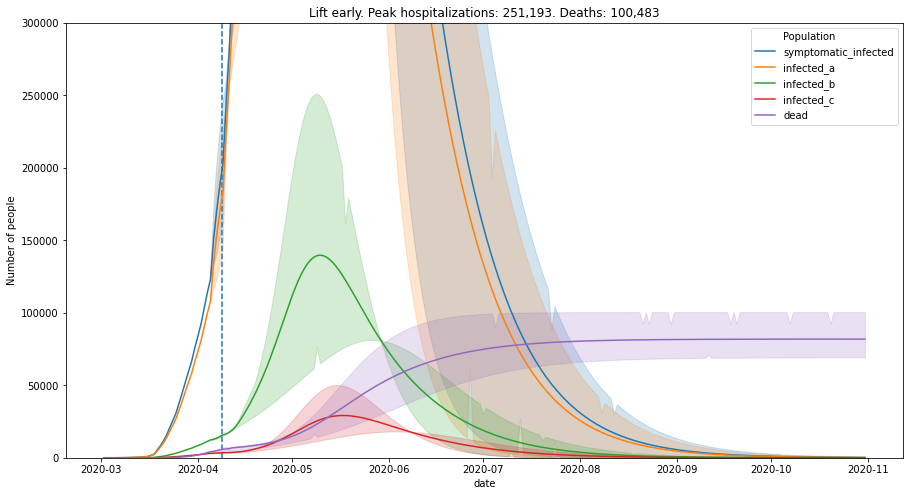

In [81]:
cols = ["symptomatic_infected", "infected_a", "infected_b", "infected_c", "dead"]

test_df = test.interventions['intervention_NY_lift_early'].display_df.copy()

end_date = datetime.datetime(2020, 11, 1)

test_df['symptomatic_infected'] = test_df.infected_a + test_df.infected_b + test_df.infected_c

test_df = test_df.loc[(test_df['date'] < end_date), :]

prep_plot(test_df, cols, 'Lift early', 300000)

first case
2020-04-01 00:00:00
peak in hospitalizations
2020-04-30T00:00:00.000000000
180,704.47847453115
peak in icu
2020-04-30T00:00:00.000000000
23,104.487127261462
deaths
16,542.250694479164


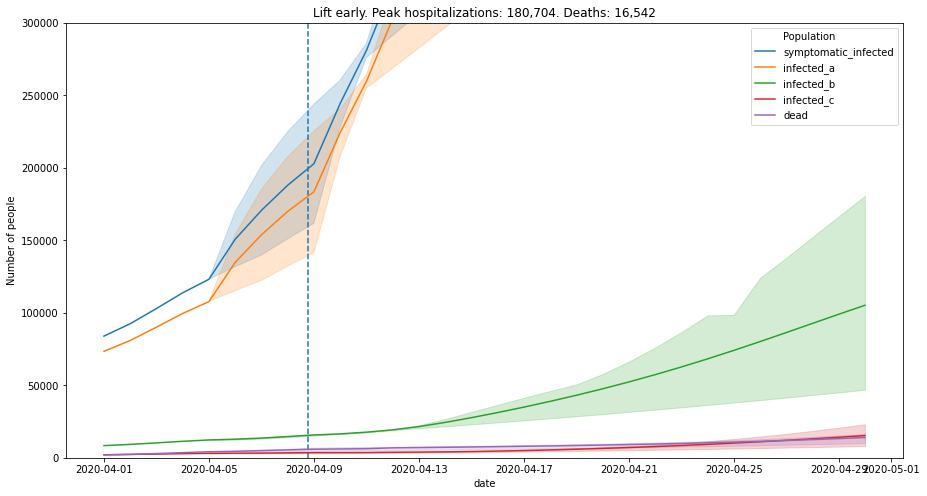

In [82]:
cols = ["symptomatic_infected", "infected_a", "infected_b", "infected_c", "dead"]

test_df = test.interventions['intervention_NY_lift_early'].display_df.copy()

end_date = datetime.datetime(2020, 5, 1)

test_df['symptomatic_infected'] = test_df.infected_a + test_df.infected_b + test_df.infected_c

test_df = test_df.loc[(test_df['date'] < end_date), :]
test_df = test_df.loc[(test_df['date'] >= datetime.datetime(2020, 4, 1)), :]

prep_plot(test_df, cols, 'Lift early', 300000)

In [83]:
test_df.head(25)

,date,exposed,infected_a,infected_b,infected_c,recovered,dead,asymp,source,infected,symptomatic_infected
65929,2020-04-01,220363.50,73454.50,8394.80,2098.70,0.00,1941.00,22036.35,actuals,105984.35,83948.00
65984,2020-04-02,242828.25,80942.75,9250.60,2312.65,0.00,2373.00,24282.83,actuals,116788.82,92506.00
66041,2020-04-03,270340.88,90113.62,10298.70,2574.68,0.00,2935.00,27034.09,actuals,130021.09,102987.00
66098,2020-04-04,298811.62,99603.88,11383.30,2845.83,0.00,3565.00,29881.16,actuals,143714.16,113833.00
66155,2020-04-05,323295.00,107765.00,12316.00,3079.00,0.00,4159.00,32329.50,actuals,155489.50,123160.00
66212,2020-04-06,346014.38,115338.12,13181.50,3295.38,0.00,4698.00,34601.44,actuals,166416.44,131815.00
66269,2020-04-07,367171.88,122390.62,13987.50,3496.88,0.00,5489.00,36717.19,actuals,176592.19,139875.00
66326,2020-04-08,396535.12,132178.38,15106.10,3776.53,0.00,6268.00,39653.51,actuals,190714.51,151061.00
0,2020-04-09,424669.88,141556.62,16177.90,4044.48,0.00,7067.00,42466.99,base run,204245.99,161779.00
1,2020-04-10,403439.17,207796.81,16410.22,4013.62,37793.08,7268.41,74563.62,base run,302784.27,228220.66


first case
2020-03-02 00:00:00
peak in hospitalizations
2020-05-09T00:00:00.000000000
251,193.95689749497
peak in icu
2020-05-15T00:00:00.000000000
50,190.20720240396
deaths
100,483.87020406227


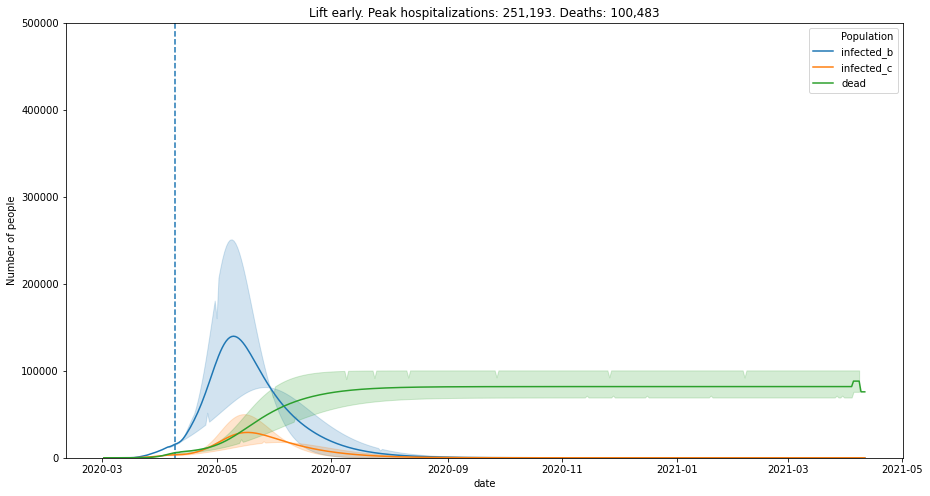

In [84]:
cols = ["infected_b", "infected_c", "dead"]

prep_plot(test.interventions['intervention_NY_lift_early'].display_df, cols, 'Lift early', 500000)